In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


import matplotlib as mpl
import bct
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
import scipy.stats as stats
import networkx as nx

In [70]:
N=19 # Areas
simulations=10
synchronization=np.zeros((N,simulations))

In [71]:
for i in range(N):
    for j in range(simulations):
        spk1= np.load('/home/ronaldo/Dados/ProjectUfabc/MouseData/SimulationData/Seed'+str(j+1)+'/Sync_'+str(i+1)+'.npy')
        synchronization[i,j]=np.mean(spk1[1,:])

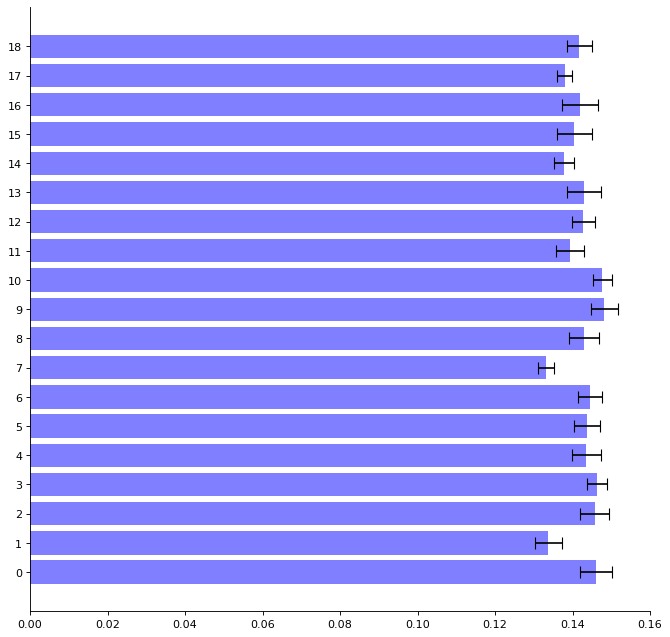

In [112]:
meanS=np.mean(synchronization,axis=1)
stdS=np.std(synchronization,axis=1)


fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.barh(range(19),np.flip(meanS),xerr=np.flip(stdS),color='blue', align='center', alpha=0.5, ecolor='black', capsize=5)
plt.yticks(range(19))
plt.xlim([0,0.16])

plt.savefig('Sync.svg')

In [73]:
# paths to load data
pathData = '/home/ronaldo/Dados/ProjectUfabc/MouseData/SimulationData/'
pathFln = '/home/ronaldo/github/ProjectUfabc/MouseKennedySNN/Data/Connectome/Kennedy.mat'

# Number of areas
Nareas=19
# Numver of trials
Ntrials=10

In [74]:
conn = loadmat(pathFln)
fln=conn['Fln']
# in-strength
inFln=np.sum(fln,0)
# out-strength
outFln=np.sum(fln,1)

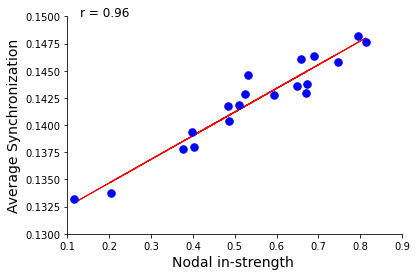

In [113]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

y = np.array(meanS)
X = np.array(inFln)
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
reg = LinearRegression().fit(X, y) 
plt.plot(X, reg.predict(X), color='red', linewidth=1)
plt.text(0.13, 0.150, 'r = %0.2f' % stats.pearsonr(meanS,inFln)[0],fontsize=12)

plt.plot(X,y,'.b',markersize=15)
plt.ylabel('Average Synchronization', fontsize=14)
plt.xlabel('Nodal in-strength ', fontsize=14)
plt.xlim([0.1,0.9])
plt.ylim([0.13,0.150])
plt.savefig('SyncInStrength.svg')

In [95]:
G = nx.from_numpy_matrix(fln,create_using=nx.DiGraph)
eign=nx.eigenvector_centrality_numpy(G,weight='weight')
eign=np.fromiter(eign.values(), dtype=float)

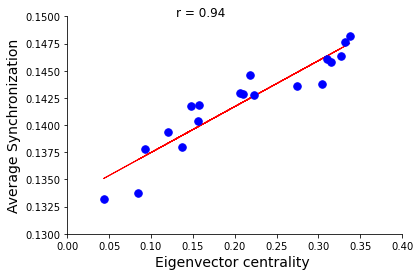

In [114]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

y = np.array(meanS)
X = np.array(eign)
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
reg = LinearRegression().fit(X, y) 
plt.plot(X, reg.predict(X), color='red', linewidth=1)
plt.text(0.13, 0.150, 'r = %0.2f' % stats.pearsonr(meanS,eign)[0],fontsize=12)

plt.plot(X,y,'.b',markersize=15)
plt.ylabel('Average Synchronization', fontsize=14)
plt.xlabel('Eigenvector centrality ', fontsize=14)
plt.xlim([0.0,0.4])
plt.ylim([0.13,0.150])
plt.savefig('SyncEC.svg')

In [100]:
meanS

array([0.14175615, 0.1379382 , 0.14185398, 0.14040011, 0.13782763,
       0.1429622 , 0.14279939, 0.13936303, 0.14764716, 0.1482311 ,
       0.14286735, 0.13317447, 0.14460953, 0.14375672, 0.14360532,
       0.14631207, 0.14575789, 0.13378423, 0.14604096])

In [115]:
inFln

array([0.48289525, 0.40217274, 0.50968821, 0.48641961, 0.37740224,
       0.6700465 , 0.59480855, 0.3978457 , 0.81274385, 0.79522494,
       0.523948  , 0.1166622 , 0.53155728, 0.67334727, 0.64825547,
       0.68989389, 0.74694179, 0.2040007 , 0.65896644])